# 데이터 준비

In [1]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/creditcard.zip

--2022-01-07 12:46:29--  https://github.com/dhrim/deep_learning_data/raw/master/creditcard.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/creditcard.zip [following]
--2022-01-07 12:46:29--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/creditcard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68750451 (66M) [application/zip]
Saving to: ‘creditcard.zip’

creditcard.zip      100%[===================>]  65.57M   330MB/s    in 0.2s    

2022-01-07 12:46:29 (330 MB/s) - ‘creditcard.zip’ saved [68750451/68750451]



In [2]:
!unzip creditcard.zip

Archive:  creditcard.zip
  inflating: creditcard.csv          


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩

In [4]:
df = pd.read_csv("creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(len(df))

284807


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.Class.unique()

array([0, 1])

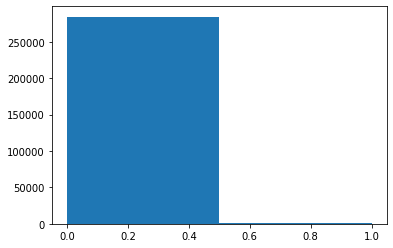

In [9]:
plt.hist(df.Class, bins=2)
plt.show()

In [10]:
df = df.sample(frac=1)

# train / test 데이터 분리

In [11]:
class1_df = df[df.Class==1]
class1_count = len(class1_df)
print(class1_count)

492


In [12]:
class0_df = df[df.Class==0]
print(len(class0_df))

284315


In [13]:
class0_test_df = class0_df.iloc[class0_df.index<=class1_count]
class0_df.drop(class0_test_df.index, inplace=True)
print(len(class0_test_df))
print(len(class0_df))

493
283822


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
train_df = class0_df
print(len(train_df))
test_df = class1_df.append(class0_test_df)
print(len(test_df))

283822
985


# numpy로 변환

In [15]:
train_df.drop(columns=["Time", "Class"], inplace=True)
print(train_df.head())

              V1        V2        V3  ...       V27       V28  Amount
134945 -1.724700  0.695928  1.675806  ...  0.144622  0.013618    0.00
147806 -0.023629  0.538677  0.459605  ... -0.134675 -0.018374   10.00
49574   1.145145 -0.767684  0.325136  ...  0.087600  0.013204   51.52
175008 -1.834877  0.320807 -1.196268  ...  0.517451 -0.329858  283.74
10304  -5.367462 -3.985117  0.560908  ...  0.469051  1.497523  500.00

[5 rows x 29 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
train_data = train_df.to_numpy()
print(train_data.shape)

(283822, 29)


In [17]:
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247673,153653.0,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,-2.120458,1.863596,-3.620252,-1.480714,-1.583343,-1.230469,-1.202298,-6.167637,-2.651539,0.013588,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,247.86,1
42856,41273.0,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,-7.570322,-12.835738,5.804708,-12.156239,1.184985,-10.468677,-0.416743,-10.999792,-22.608868,-9.498746,2.102735,-1.009320,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,173.07,1
57248,47826.0,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,0.141179,-0.460348,-0.367868,-1.168339,0.152108,0.882232,0.601805,-0.304092,-2.191764,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.58,1
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
163149,115691.0,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,-3.514133,3.586042,-4.053358,0.862426,-5.765823,-0.507511,-4.921865,-9.567268,-2.772974,1.717095,0.327490,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.06,1


In [18]:
test_y = test_df.Class.to_numpy()
print(test_y.shape)
print(test_y[:10])

(985,)
[1 1 1 1 1 1 1 1 1 1]


In [19]:
test_df.drop(columns=["Time", "Class"], inplace=True)
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
247673,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,-2.120458,1.863596,-3.620252,-1.480714,-1.583343,-1.230469,-1.202298,-6.167637,-2.651539,0.013588,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,247.86
42856,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,-7.570322,-12.835738,5.804708,-12.156239,1.184985,-10.468677,-0.416743,-10.999792,-22.608868,-9.498746,2.102735,-1.009320,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,173.07
57248,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,0.141179,-0.460348,-0.367868,-1.168339,0.152108,0.882232,0.601805,-0.304092,-2.191764,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.58
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
163149,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,-3.514133,3.586042,-4.053358,0.862426,-5.765823,-0.507511,-4.921865,-9.567268,-2.772974,1.717095,0.327490,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.06


In [20]:
test_data = test_df.to_numpy()
print(test_data.shape)
print(test_data[0])

(985, 29)
[-5.19249643e+00  3.16472117e+00 -5.04767906e+00  2.24659736e+00
 -4.01178140e+00 -6.38908045e-01 -2.87346327e+00  1.57631757e+00
 -2.86198599e+00 -2.12045759e+00  1.86359574e+00 -3.62025176e+00
 -1.48071442e+00 -1.58334341e+00 -1.23046922e+00 -1.20229797e+00
 -6.16763654e+00 -2.65153905e+00  1.35877062e-02 -1.85046996e+00
  1.16724379e+00 -1.00661749e+00  7.74561804e-01  6.33969166e-02
 -3.90657771e-01  1.88474067e+00 -1.74255751e+00 -8.22159347e-02
  2.47860000e+02]


# Normalize

In [21]:
maxs = train_data.max(axis=0)
print(maxs)
mins = train_data.min(axis=0)
print(mins)

[2.45492999e+00 1.89024528e+01 9.38255843e+00 1.68753440e+01
 3.48016659e+01 7.33016255e+01 1.20589494e+02 1.87092545e+01
 1.55949946e+01 2.37451361e+01 1.00021902e+01 7.84839208e+00
 7.12688296e+00 1.05267661e+01 8.87774160e+00 1.73151115e+01
 9.25352625e+00 5.04106919e+00 5.59197143e+00 3.94209042e+01
 2.26148894e+01 1.05030901e+01 2.25284117e+01 4.58454914e+00
 7.51958868e+00 3.51734561e+00 3.16121981e+01 3.38478078e+01
 2.56911600e+04]
[ -56.40750963  -72.71572756  -48.32558936   -5.6831712  -113.74330671
  -26.16050594  -31.76494649  -73.21671846   -6.29073039  -14.74109638
   -4.79747346  -15.14498822   -5.79188121  -18.3920915    -4.39130707
  -10.11555995  -17.09844421   -5.36665996   -7.21352743  -54.49772049
  -34.83038214  -10.9331437   -44.8077352    -2.83662692  -10.29539707
   -2.60455055  -22.56567932  -15.43008391    0.        ]


In [22]:
train_x = (train_data - mins) / (maxs - mins)
print(train_x[:2])

[[9.28993260e-01 8.01278257e-01 8.66452959e-01 2.90073883e-01
  7.65816226e-01 2.60546980e-01 2.07617720e-01 8.04676669e-01
  2.53802145e-01 3.79510254e-01 4.16086342e-01 6.66679609e-01
  3.41070622e-01 6.70158053e-01 4.06806202e-01 3.66737095e-01
  6.53746988e-01 5.25346720e-01 6.01485722e-01 5.78983401e-01
  6.03386477e-01 4.85769123e-01 6.72322873e-01 3.98345182e-01
  5.85341956e-01 3.39226673e-01 4.19180341e-01 3.13400212e-01
  0.00000000e+00]
 [9.57892356e-01 7.99561879e-01 8.45377930e-01 2.08184699e-01
  7.70041226e-01 2.59292376e-01 2.14534179e-01 7.93710273e-01
  2.92574280e-01 3.79750259e-01 3.33606096e-01 6.59435361e-01
  3.82841862e-01 6.41103842e-01 2.63837320e-01 3.79127983e-01
  6.11079057e-01 5.51952862e-01 5.82620704e-01 5.78672967e-01
  6.07965269e-01 5.30947970e-01 6.64033520e-01 3.18832746e-01
  5.19519090e-01 4.83767116e-01 4.14025162e-01 3.12751006e-01
  3.89238944e-04]]


In [23]:
test_x = (test_data - mins) / (maxs - mins)
print(test_x[:2])

[[ 0.87007969  0.8282248   0.74994454  0.35151997  0.73870912  0.25659613
   0.18963335  0.81362246  0.15666579  0.32792607  0.45008247  0.50121976
   0.33371356  0.58123832  0.23821134  0.3249378   0.41480039  0.26087544
   0.56437592  0.56056241  0.62664211  0.46307231  0.67693652  0.39077685
   0.55597795  0.73331711  0.38434732  0.31145545  0.00964768]
 [ 0.7598274   0.86280484  0.60699366  0.59285565  0.69240591  0.23494515
   0.12604269  0.87574641 -0.05846697  0.04950754  0.71637988  0.12998301
   0.54005676  0.27398781  0.29953646 -0.03223517 -0.20910861 -0.3970209
   0.72752049  0.56951857  0.64346181  0.45071512  0.66490932  0.46511235
   0.59749814  0.35538462  0.40368403  0.29650444  0.00673656]]


# 모델 학습

In [24]:
feature_count = train_x.shape[1]
print(feature_count)

29


In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [35]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=feature_count))
model.add(Dense(5, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(feature_count))

model.compile(optimizer='Adam', loss='mae', metrics=["mape"])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

hist = model.fit(train_x, train_x, epochs=1000, batch_size=1024, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.1299 - mape: 3913.4021 - val_loss: 0.0263 - val_mape: 5151.0908
Epoch 2/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.0261 - mape: 1712.3013 - val_loss: 0.0260 - val_mape: 4514.2725
Epoch 3/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.0259 - mape: 1679.5259 - val_loss: 0.0259 - val_mape: 4515.0850
Epoch 4/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.0259 - mape: 1678.4279 - val_loss: 0.0259 - val_mape: 4151.3970
Epoch 5/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.0259 - mape: 1669.4691 - val_loss: 0.0258 - val_mape: 4278.7734
Epoch 6/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.0259 - mape: 1688.3357 - val_loss: 0.0258 - val_mape: 4214.9326
Epoch 7/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.0258 - mape: 1651.2793 - val_loss: 0.0258 - val_mape: 4126.7681
Epoch 

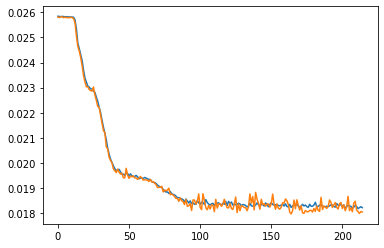

In [36]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

# 탐지 실행

## threshold 구하기

In [37]:
reconstructed = model.predict(train_x)

train_mae = np.mean(np.abs(reconstructed - train_x), axis=-1)
print(train_mae)

[0.01727257 0.01300748 0.01975534 ... 0.01882365 0.00940234 0.04363048]


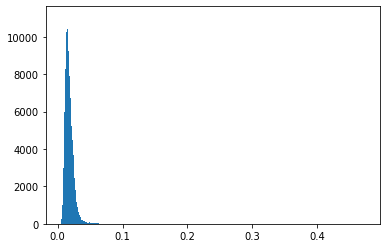

In [38]:
plt.hist(train_mae, bins=1000)
plt.show()

In [39]:
sorted_mae = np.sort(train_mae)
threshold_index = int(len(sorted_mae)*0.99)
threshold = sorted_mae[threshold_index]

print(threshold)

0.04269888389884128


## 테스트 데이터 모델 예측

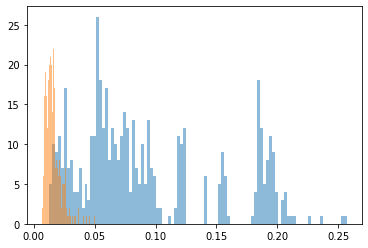

In [40]:
reconstructed = model.predict(test_x)
test_mae = np.mean(np.abs(reconstructed - test_x), axis=-1)

half_index = int(len(test_mae)*0.5)
plt.hist(test_mae[:half_index], bins=100, alpha=0.5)
plt.hist(test_mae[half_index:], bins=100, alpha=0.5)
plt.show()

In [41]:
predicted = (test_mae > threshold).astype(np.int16)

n = len(test_x)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.9005076142131979
